# SODIUM FAST REACTOR MODEL
Problem data

In [14]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy

# initial data

P0 = 3570e6    # W thermal
Tc_out0 = 550  # °C
Tc_in0 = 395   # °C
Tf0 = 1100     # °C

M_f = 107360   # kg
C_f = 337      # J/(kg*K)

M_c = 4764     # kg
C_c = 1266     # J/(kg*K)
G_c = 18200    # kg/s

M_1 = 69892    # kg

M_2 = 70802    # kg
C_2 = 1273     # J/(kg*K)
G_2 = 15000    # kg/s

M_SG = 212405  # kg

tau_HL1 = 1    # s
tau_CL1 = 3    # s

tau_HL2 = 3    # s
tau_CL2 = 3    # s

T2_in0 = 335   # °C
T2_out0 = 520  # °C
Tsat = 362     # °C

li = np.array([0.0129,0.0311,0.134,0.331,1.26,3.21])                # 1/s
bi = np.array([8.21, 74.48, 66.15, 132.77, 61.48, 18.94])*10**-5
LA = 0.445e-6    # s

# in case of one group approximation:
b = np.sum(bi)
l = (np.sum(np.divide(bi,li))/b)**(-1)   # 1/s

# feedback coefficients

alpha_r = -0.735e-5           #  1/°C
alpha_s = 0.63e-5             #  1/°C
alpha_a = -0.243e-5           #  1/°C
alpha_d = -0.455e-5           #  1/°C
alpha_h = 10e-5               #  1/cm

alpha_c = alpha_s + alpha_r   # 1/°C
alpha_f = alpha_d + alpha_a   # 1/°C

# Calculation Parameters

Tc0 = (Tc_in0 + Tc_out0)/2      # °C
T1_in0 = Tc_out0                # °C
T1_out0 = Tc_in0                # °C
TSG_out0 = T2_in0               # °C
TSG_in0 = T2_out0               # °C
T1_0 = (T1_in0 + T1_out0)/2     # °C
T2_0 = (T2_in0 + T2_out0)/2     # °C
TSG_0 = (TSG_in0 + TSG_out0)/2  # °C

K = P0/(Tf0 - Tc0)                                    # W/K
K_IHX = -G_c*C_c*(T1_out0 - T1_in0)/(T1_0 - T2_0)     # W/K
K_SG = -G_2*C_2*(TSG_out0 - TSG_in0)/(TSG_0 - Tsat)   # W/K

tau_c = (K/(M_c*C_c))**-1            # s
tau_f = (K/(M_f*C_f))**-1            # s
tau_0 = (G_c/M_c)**-1                # s
tau_1 = (G_c/M_1)**-1                # s 
tau_2 = (G_2/M_2)**-1                # s
tau_SG = (G_2/M_SG)**-1              # s
tau_IHX1 = (K_IHX/(M_1*C_c))**-1     # s
tau_IHX2 = (K_IHX/(M_2*C_2))**-1     # s
tau_SG2 = (K_SG/(M_SG*C_2))**-1      # s

# Linearised model

The dominant eigenvalue of A is: -0.012703243109225158


Text(0.5, 1.0, 'System eigenvalues')

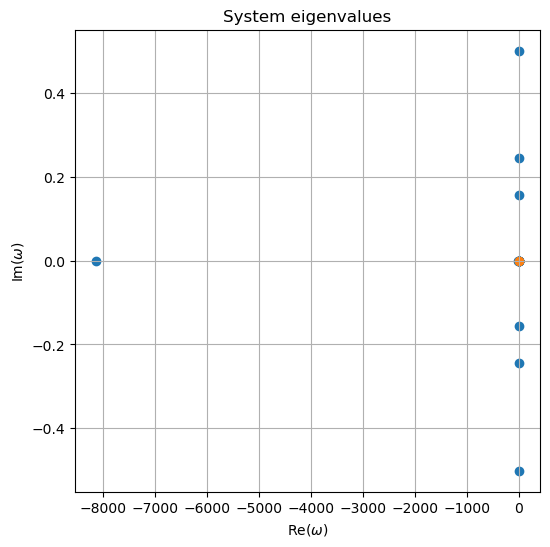

In [15]:
import warnings
warnings.filterwarnings("ignore") # in order not to have warnings about the badly conditioned matrix A

# System variables
#phi, eta_1, eta_2, eta_3, eta_4, eta_5, eta_6, T_c, T_f, Tc_in, T1, T1_in, T2, T2_in, T_SG, T_SG_in, s, rho_e, rho, Tc_out = sy.symbols("phi, eta_1, eta_2, eta_3, eta_4, eta_5, eta_6, T_c, T_f, Tc_in, T1, T1_in, T2, T2_in, T_SG, T_SG_in, s, rho_e, rho, Tc_out")




# Variables and output vectors
#X = np.vstack([phi, eta_1, eta_2, eta_3, eta_4, eta_5, eta_6, T_c, Tc_in, T_f, T1, T1_in, T2, T2_in, T_SG, T_SG_in])
#Y = np.vstack([X, rho, Tc_out])

# State space matrices
A = ([[-b/LA, bi[0]/LA, bi[1]/LA, bi[2]/LA, bi[3]/LA, bi[4]/LA, bi[5]/LA, alpha_c/LA, 0, alpha_f/LA, 0, 0, 0, 0, 0, 0],      # dphi/dt
      [li[0], -li[0], 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],                                                                                     # deta1/dt
      [li[1], 0, -li[1], 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],                                                                                     # deta2/dt
      [li[2], 0, 0, -li[2], 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],                                                                                     # deta3/dt
      [li[3], 0, 0, 0, -li[3], 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],                                                                                     # deta4/dt
      [li[4], 0, 0, 0, 0, -li[4], 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],                                                                                     # deta5/dt
      [li[5], 0, 0, 0, 0, 0, -li[5], 0, 0, 0, 0, 0, 0, 0, 0, 0],                                                                                     # deta6/dt
      [0, 0, 0, 0, 0, 0, 0, -1/tau_c - 2/tau_0, 2/tau_0, 1/tau_c, 0, 0, 0, 0, 0, 0],                                                                 # dTc/dt
      [0, 0, 0, 0, 0, 0, 0, 0, -1/tau_CL1, 0, 2/tau_CL1, -1/tau_CL1, 0, 0, 0, 0],                                                                    # dTc_in/dt
      [P0/(M_f*C_f), 0, 0, 0, 0, 0, 0, 1/tau_f, 0, -1/tau_f, 0, 0, 0, 0, 0, 0],                                                                      # dTf/dt
      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -2/tau_1 -1/tau_IHX1, 2/tau_1, 1/tau_IHX1, 0, 0, 0],                                                            # dT1/dt
      [0, 0, 0, 0, 0, 0, 0, 2/tau_HL1, -1/tau_HL1, 0, 0, -1/tau_HL1, 0, 0, 0, 0],                                                                    # dT1_in/dt
      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1/tau_IHX2, 0, -2/tau_2 - 1/tau_IHX2, 2/tau_2, 0 ,0],                                                           # dT2/dt
      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1/tau_CL2, 2/tau_CL2, -1/tau_CL2],                                                                    # dT2_in/dt
      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -2/tau_SG - 1/tau_SG2, 2/tau_SG],                                                                   # dTSG/dt
      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2/tau_HL2, -1/tau_HL2, 0, -1/tau_HL2]                                                                     # dTSG_in/dt
      ])

B = ([[0, alpha_h/LA],
      [0, 0],
      [0, 0],
      [0, 0],
      [0, 0],
      [0, 0],
      [0, 0],
      [0, 0],
      [0, 0],
      [0, 0],
      [0, 0],
      [0, 0],
      [0, 0],
      [0, 0],
      [1/tau_SG2, 0],
      [0, 0]
      ])

#U = ([[Tsat], [dh]])

C = np.identity(len(A))
lastrows = np.array([[0, 0, 0, 0, 0, 0, 0, alpha_c, 0, alpha_f, 0, 0, 0, 0, 0, 0],
                     [0, 0, 0, 0, 0, 0, 0, 2, -1, 0, 0, 0, 0, 0, 0, 0]
                     ])
C = np.vstack([C, lastrows])

D = ([[0, 0],
      [0, 0],
      [0, 0],
      [0, 0],
      [0, 0],
      [0, 0],
      [0, 0],
      [0, 0],
      [0, 0],
      [0, 0],
      [0, 0],
      [0, 0],
      [0, 0],
      [0, 0],
      [0, 0],
      [0, 0],
      [0, alpha_h],
      [0, 0]
      ])

dyn_sys = sp.signal.StateSpace(A,B,C,D)



# The eigenvalues of A are
w = np.linalg.eigvals(A)
dominant = np.max(np.real(w))
print('The dominant eigenvalue of A is: '+str(dominant))

# Initial state of the system
X_0 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

# time points
t = np.linspace(0,100,300000)     # s

# Simulation: ss2tf() creates the transfer functions of my state space system for all my variables
TF_Tsat = sp.signal.ss2tf(A, B, C, D, input=0)    # Transfer functions of my output variables respect to my first input: Tsat
TF_dh = sp.signal.ss2tf(A, B, C, D, input=1)      # Transfer functions of my output variables respect to my second input: dh

# The 2 arrays above contain the coefficient of the polinomials in s in the numerator and denominator of the TFs. The denominator is common because the input is the same


# System evolution
t, Y_Tsat = sp.signal.step(TF_Tsat, X0=X_0, T=t)     # Y_Tsat has n-rows (1 for each time step) and m-columns (1 for each output variable) and contains the time variation of each variable respect to the step input Tsat
t, Y_dh = sp.signal.step(TF_dh, X0=X_0, T=t)

# Eigenvalues plot
Maxw = np.max(w)
plt.figure(figsize = (6,6))
plt.scatter(np.real(w), np.imag(w))
plt.scatter(np.real(Maxw), np.imag(Maxw))
plt.grid()
plt.xlabel(r'Re($\omega$)')
plt.ylabel(r'Im($\omega$)')
plt.title('System eigenvalues')

Since the dominant eigenvalue has a negative real part, the system is stable

# Linearised model plots

Variations of the system parameters respect to their nominal values


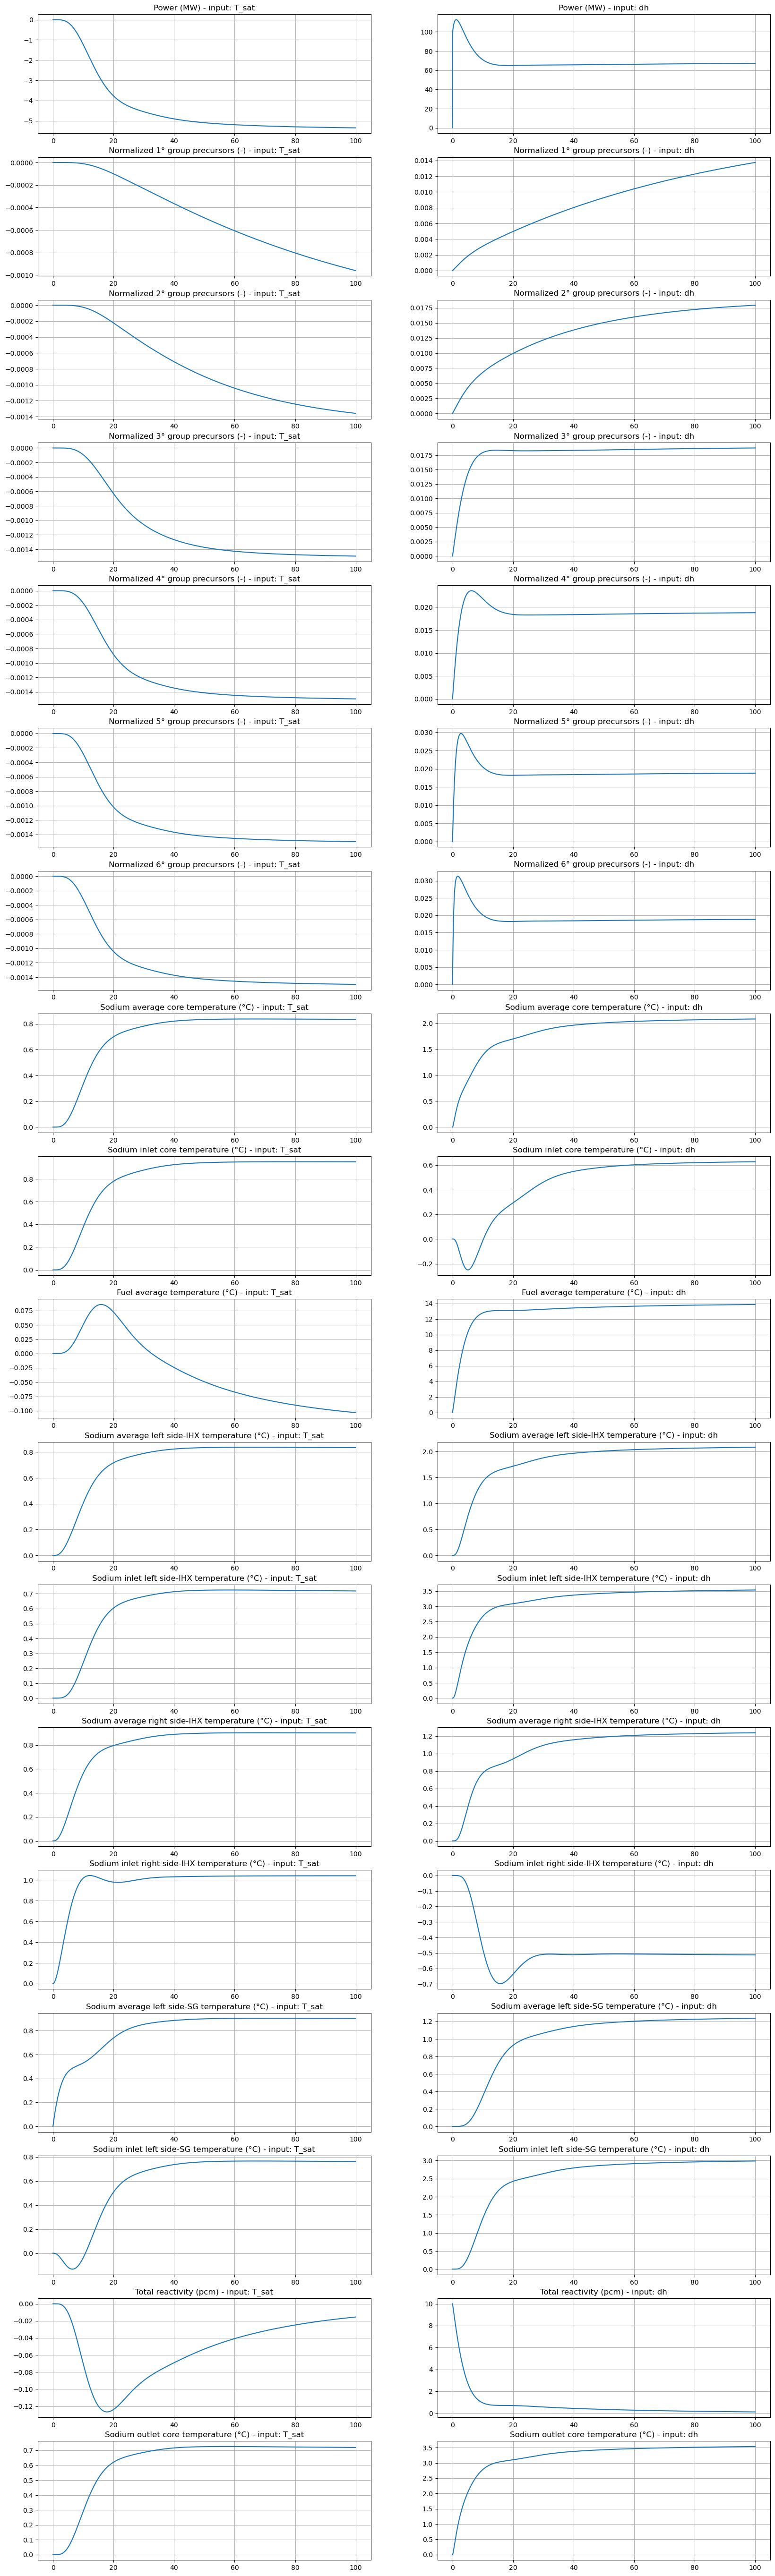

In [16]:
fig, axs = plt.subplots(len(C), 2, figsize=(20, 70))
Y_Tsat[:,0] = Y_Tsat[:,0] * P0/1e6     # I convert the normalized power phi in absolute power variation (MW)
Y_dh[:,0] = Y_dh[:,0] * P0/1e6         # I convert the normalized power phi in absolute power variation (MW)

Y_Tsat[:,16] = Y_Tsat[:,16] * 1e5      # I consider the reactivity in terms of pcm
Y_dh[:,16] = Y_dh[:,16] * 1e5          # I consider the reactivity in terms of pcm

Titles_lin = ["Power (MW)",
              "Normalized 1° group precursors (-)",
              "Normalized 2° group precursors (-)",
              "Normalized 3° group precursors (-)",
              "Normalized 4° group precursors (-)",
              "Normalized 5° group precursors (-)",
              "Normalized 6° group precursors (-)",
              "Sodium average core temperature (°C)",
              "Sodium inlet core temperature (°C)",
              "Fuel average temperature (°C)",
              "Sodium average left side-IHX temperature (°C)",
              "Sodium inlet left side-IHX temperature (°C)",
              "Sodium average right side-IHX temperature (°C)",
              "Sodium inlet right side-IHX temperature (°C)",
              "Sodium average left side-SG temperature (°C)",
              "Sodium inlet left side-SG temperature (°C)",
              "Total reactivity (pcm)",
              "Sodium outlet core temperature (°C)"
              ]

print('Variations of the system parameters respect to their nominal values')

for j in range(len(C)):   # I plot the output variables in response to the 1° step input
  axs[j, 0].plot(t, Y_Tsat[:,j])
  axs[j, 0].set_title(f'{Titles_lin[j]} - input: T_sat')
  axs[j, 0].grid()

for j in range(len(C)):   # I plot the output variables in response to the 2° step input
  axs[j, 1].plot(t, Y_dh[:,j])
  axs[j, 1].set_title(f'{Titles_lin[j]} - input: dh')
  axs[j, 1].grid()

T_sat input (saturation temperature increases of 1°C):  the sodium average temperatures raise and so the power exchanged and produced decreses

dh input (control rods are lifted by 1 cm, so this leads to 10 pcm reactivity insertion): the power produced raises and so do precursors and average temperatures of the cycles. This way the power transferred to the water cycle is higher

# Stability map

Text(0, 0.5, '$\\alpha_f$ (pcm/K)')

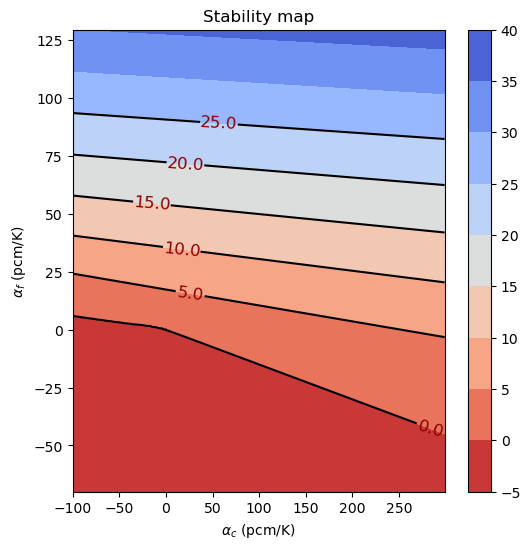

In [17]:
# Points for mapping stability
M = 400
N = 400
x = np.zeros(N)
y = np.zeros(M)
Map = np.zeros((M,N))

# Eigenvalues calculation
for ALF in range(0, M):
    for ALC in range(0, N):
        alpha_f = (-70 + ALF/2)*1e-5 # so that alpha_d lies within (-70, 130) pcm/°C
        alpha_c = (-100 + ALC)*1e-5  # so that alpha_c lies within (-100, 300) pcm/°C
        x[ALC] = -100 + ALC          # x-position on my map
        y[ALF] = -70 + ALF/2         # y-position on my map

        # I modify my matrix A each iteration with the new alpha_f or alpha_c I just computed and I calculate each time the new eigenvalues
        A[0][7] = alpha_c/LA
        A[0][9] = alpha_f/LA

        w = np.linalg.eigvals(A)
        MaxRealw = np.max(np.real(w))
        Map[ALF,ALC] = MaxRealw       # I associate with the point (ALF,ALC) on the map the max real value of my eigenvalues

# Plotting the stability map
plt.figure(figsize = (6,6))
levels = [-10, 0, 5, 10, 15, 20, 25]
contour = plt.contour(x, y, Map, levels, colors = 'black')
plt.clabel(contour, colors = 'darkred', fmt = '%2.1f', fontsize = 12)
contour_filled = plt.contourf(x, y, Map, cmap = 'coolwarm_r')
plt.colorbar(contour_filled)
plt.title('Stability map')
plt.xlabel(r'$\alpha_c$ (pcm/K)')
plt.ylabel(r'$\alpha_f$ (pcm/K)')

# Non linear model

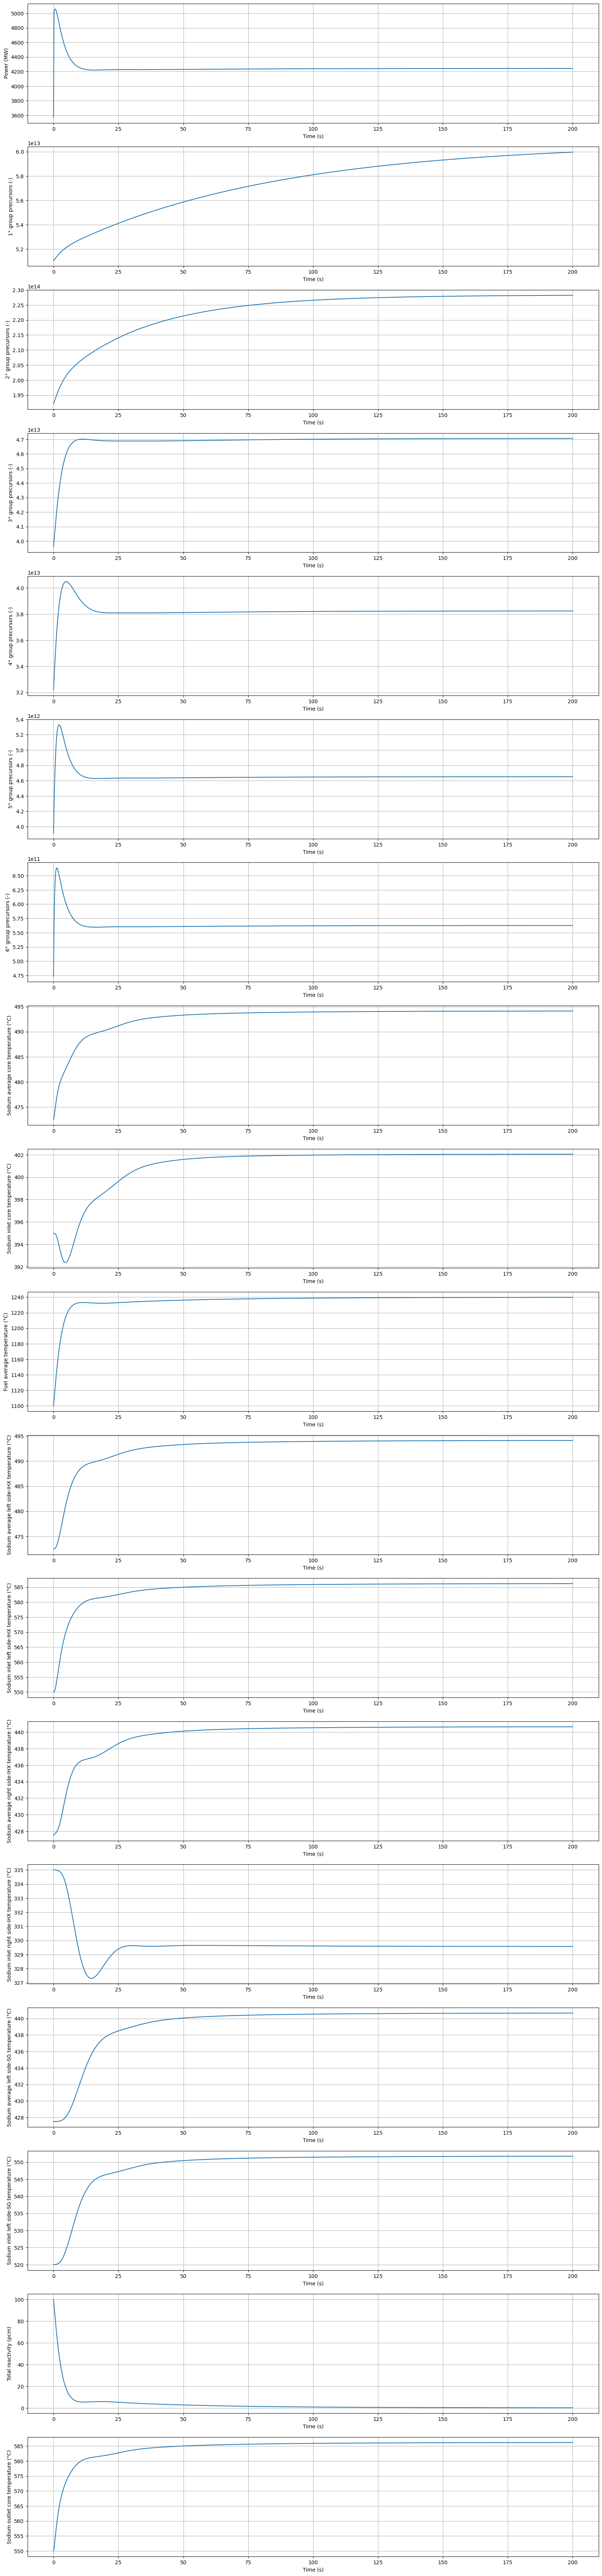

In [18]:
# Initial conditions
C1_0 = bi[0]*P0 / (LA*li[0])
C2_0 = bi[1]*P0 / (LA*li[1])
C3_0 = bi[2]*P0 / (LA*li[2])
C4_0 = bi[3]*P0 / (LA*li[3])
C5_0 = bi[4]*P0 / (LA*li[4])
C6_0 = bi[5]*P0 / (LA*li[5])

TH_0 = np.array([[Tc0], [Tc_in0], [Tf0], [T1_0], [T1_in0], [T2_0], [T2_in0], [TSG_0], [TSG_in0]])
NEU_0 = np.array([[P0], [C1_0], [C2_0], [C3_0], [C4_0], [C5_0], [C6_0]])
SFR_0 = np.append(NEU_0, TH_0)

alpha_c = alpha_s + alpha_r   # 1/°C
alpha_f = alpha_d + alpha_a   # 1/°C
alpha_h = 10e-5               # 1/cm

# time points
t_0 = 0      # s
t_f = 200    # s
t_span = (t_0, t_f)
t = np.linspace(t_0, t_f, 1000)

# Input
rho_0 = 0
dh = 10          # cm, so that I have alpha_h*dh = 100 pcm insertion
U = [Tsat, dh]

# Reactivity insertion is around rho_h/beta = 100/362 = 0,3 $

# Model
def Dyn_model(t, state):

    P, C1, C2, C3, C4, C5, C6, Tc, Tc_in, Tf, T1, T1_in, T2, T2_in, TSG, TSG_in = state

    dPdt = (rho_0 + alpha_h*U[1] + alpha_f*(Tf - TH_0[2]) + alpha_c*(Tc - TH_0[0]) - b) * P/LA + li[0]*C1 + li[1]*C2 + li[2]*C3 + li[3]*C4 + li[4]*C5 + li[5]*C6

    dC1dt = bi[0]*P/LA - li[0]*C1
    dC2dt = bi[1]*P/LA - li[1]*C2
    dC3dt = bi[2]*P/LA - li[2]*C3
    dC4dt = bi[3]*P/LA - li[3]*C4
    dC5dt = bi[4]*P/LA - li[4]*C5
    dC6dt = bi[5]*P/LA - li[5]*C6

    dTcdt = (Tf - Tc)/tau_c - 2*(Tc - Tc_in)/tau_0
    dTc_indt = ((2*T1 - T1_in) - Tc_in)/tau_CL1

    dTfdt = P/(M_f*C_f) - (Tf - Tc)/tau_f

    dT1dt = - (T1 - T2)/tau_IHX1 - 2*(T1 - T1_in)/tau_1
    dT1_indt = ((2*Tc - Tc_in) - T1_in)/tau_HL1

    dT2dt = (T1 - T2)/tau_IHX2 - 2*(T2 - T2_in)/tau_2
    dT2_indt = ((2*TSG - TSG_in) - T2_in)/tau_CL2

    dTSGdt = - (TSG - U[0])/tau_SG2 - 2*(TSG - TSG_in)/tau_SG
    dTSG_indt = ((2*T2 - T2_in) - TSG_in)/tau_HL2

    dXdt = [dPdt, dC1dt, dC2dt, dC3dt, dC4dt, dC5dt, dC6dt, dTcdt, dTc_indt, dTfdt, dT1dt, dT1_indt, dT2dt, dT2_indt, dTSGdt, dTSG_indt]

    return dXdt

# ODE solver
sol = sp.integrate.solve_ivp(Dyn_model, t_span, SFR_0, t_eval = t, method = 'RK45', rtol = 1e-6, atol = 1e-8)  # this solves numerically the system of differential equations with RK45 given the IC

sol.y[0] = sol.y[0] / 1e6        # I measure power in MW

delta_Tf = sol.y[9] - TH_0[2]    # fuel temperature variation from the IC during time
delta_Tc = sol.y[7] - TH_0[0]    # coolant temperature variation from the IC during time

rho = (rho_0 + alpha_h*U[1] + alpha_f*delta_Tf + alpha_c*delta_Tc) * 1e5    # reactivity at each time in pcm
Tc_out = 2*sol.y[7] - sol.y[8]                                              # core outlet temperature at each time


# Plotting Results
fig, axs = plt.subplots(len(sol.y)+2, 1, figsize=(20, 90))

Titles = ["Power (MW)",
          "1° group precursors (-)",
          "2° group precursors (-)",
          "3° group precursors (-)",
          "4° group precursors (-)",
          "5° group precursors (-)",
          "6° group precursors (-)",
          "Sodium average core temperature (°C)",
          "Sodium inlet core temperature (°C)",
          "Fuel average temperature (°C)",
          "Sodium average left side-IHX temperature (°C)",
          "Sodium inlet left side-IHX temperature (°C)",
          "Sodium average right side-IHX temperature (°C)",
          "Sodium inlet right side-IHX temperature (°C)",
          "Sodium average left side-SG temperature (°C)",
          "Sodium inlet left side-SG temperature (°C)",
          "Total reactivity (pcm)",
          "Sodium outlet core temperature (°C)"
          ]

# I copy in a new array all the variables I want to plot
results = np.array([solution_i for solution_i in sol.y])

results = np.vstack([results, [rho, Tc_out]])

for j in range(len(results)):                      # I plot the output variables in response to the 1° step input
  axs[j].plot(t, results[j])                       # non-linear model
  axs[j].set_ylabel(f'{Titles[j]}')
  axs[j].set_xlabel('Time (s)')
  axs[j].grid()


Following a reactivity insertion of 100 pcm, the system reaches a new steady state at higher temperatures and power once the reactivity feedbacks have balanced the control rods raising and the reactivity has been brought back to zero.

# Comparison between non-linear and linear models

Parameters variations respect to their nominal values after a reactivity insertion of 100 pcm


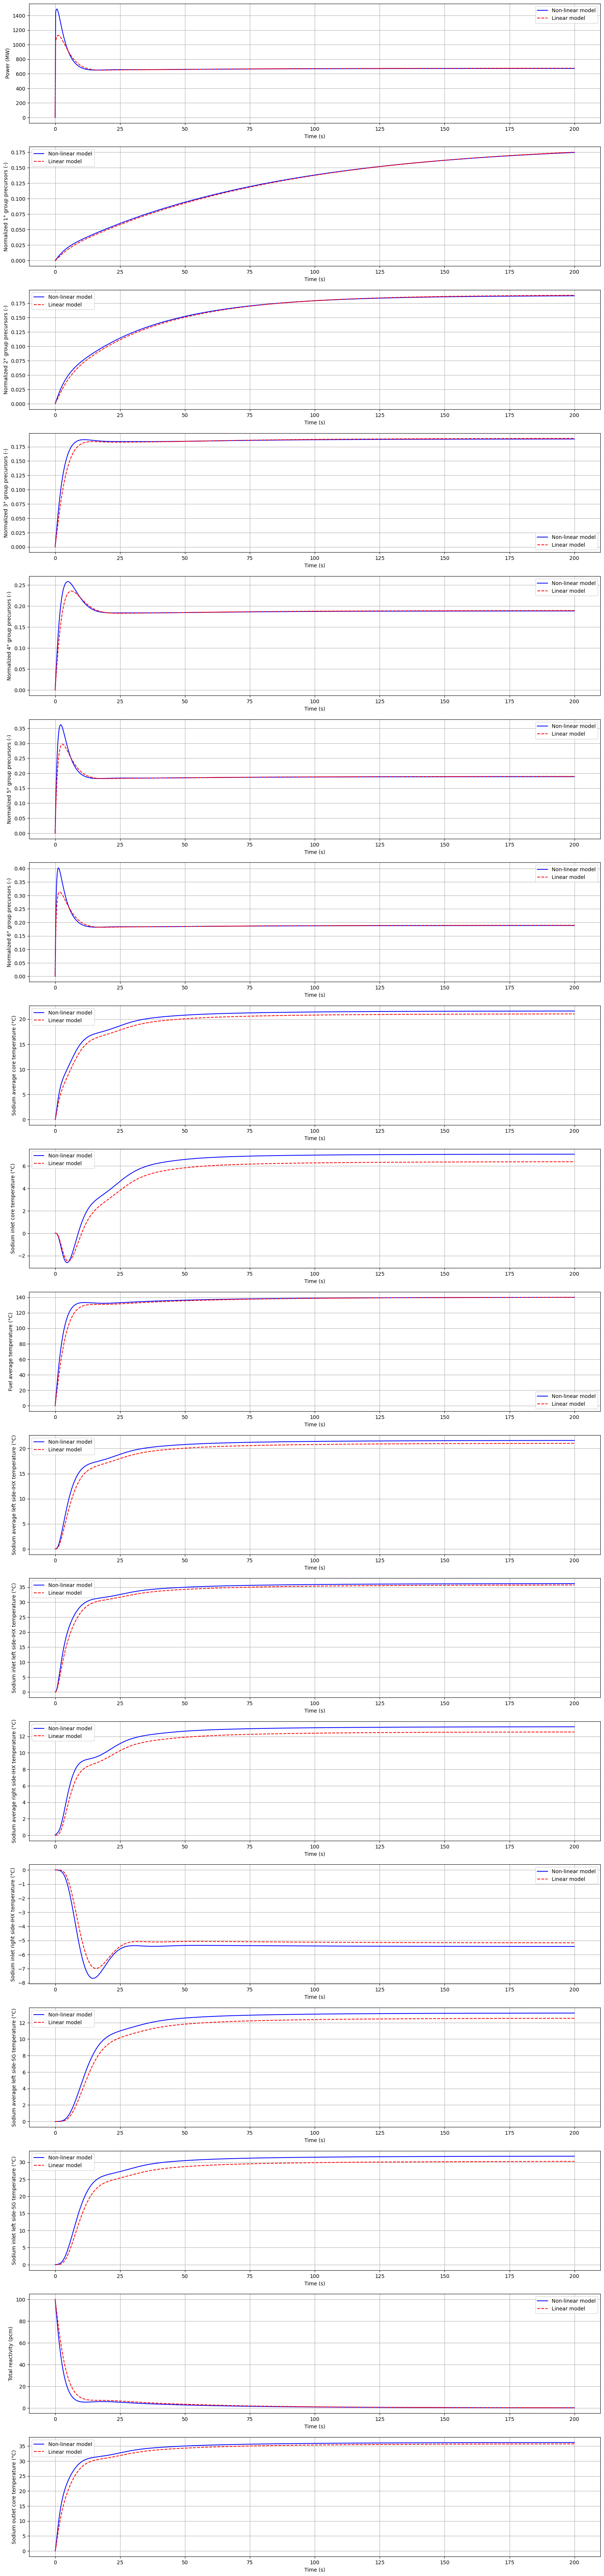

In [19]:
# In order to have the same reactivity insertion of 100 pcm in the linear model
B[0][1] = 10*alpha_h/LA
D[16][1] = 10*alpha_h

A[0][7] = alpha_c/LA
A[0][9] = alpha_f/LA

# Simulation: ss2tf() creates the transfer functions of my state space system for all my variables
TF_dh = sp.signal.ss2tf(A, B, C, D, input=1)      # Transfer functions of my output variables respect to my input: dh

# The array above contains the coefficient of the polinomials in s in the numerator and denominator of the TFs

# System evolution
t, Y_dh = sp.signal.step(TF_dh, X0=X_0, T=t)        # Y_dh has n-rows (1 for each time step) and m-columns (1 for each output variable) and contains the time variation of each variable respect to the step input dh

Y_dh[:,0] = Y_dh[:,0] * P0 * 1e-6                   # I measure power in (MW)

Y_dh[:,16] = Y_dh[:,16] * 1e5                       # I consider the reactivity in terms of (pcm)


# Now I need the results of the non-linear model in terms of variations from the nominal values
InitialValues = SFR_0
InitialValues[0] = InitialValues[0] * 1e-6 # I want power to be in (MW)

results_var = results[:-2] # I copy all the data except the last 2

for i in range(len(results_var)):
  results_var[i] = results_var[i] - InitialValues[i] # I want to plot the variations respect to the nominal values

# I add the variations of reactivity and outlet core temperature
results_var = np.vstack([results_var, [rho, Tc_out-(2*TH_0[0]-TH_0[1])]])


# Plotting Results
fig, axs = plt.subplots(len(results_var), 1, figsize=(20, 90))

print('Parameters variations respect to their nominal values after a reactivity insertion of 100 pcm')

# I plot the output variables in response to the 1° step input
for j in range(len(results_var)):

  if j>=1 and j<=6: # I normalize the precursors
    results_var[j] = results_var[j] / InitialValues[j]

  axs[j].plot(t, results_var[j], color='blue')                       # non-linear model
  axs[j].plot(t, Y_dh[:,j], color='red', linestyle='dashed')         # linear model
  axs[j].set_ylabel(f'{Titles_lin[j]}')
  axs[j].set_xlabel('Time (s)')
  axs[j].legend(['Non-linear model', 'Linear model'])
  axs[j].grid()



In the linear model, the same reactivity insertion leads to a lower power peak. This is due to the fact that I'm neglecting the second order infinitesimal term, which in this case gives a significant contribution, as it can be demonstrated using prompt jump approximation.

Apart from this, the linear model gives satisfying results

# Stability map verification with the non-linear model

KeyboardInterrupt: 

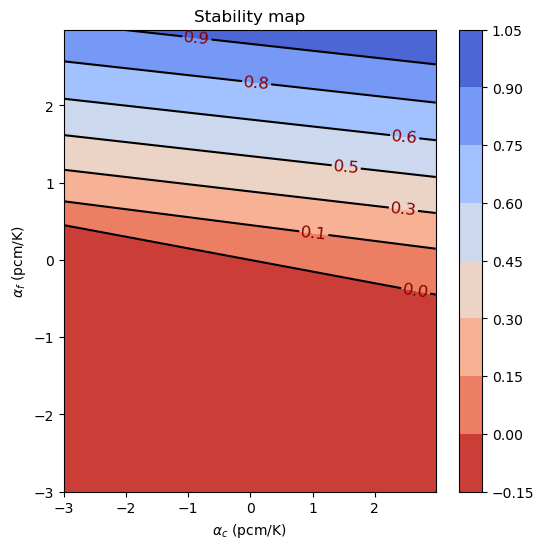

In [20]:
# time points
t_0 = 0       # s
t_f = 400     # s
t_span = (t_0, t_f)
t = np.linspace(t_0, t_f, 600)

# Input
rho_0 = 0
dh = 10          # cm
U = [Tsat, dh]

alpha_h = 10e-5  # 1/cm

# Reactivity insertion is around rho_h/beta = 100/362 = 0,3 $

# Points for mapping stability
M = 300
N = 300
x = np.zeros(N)
y = np.zeros(M)
Map = np.zeros((M,N))
# Eigenvalues calculation
for ALF in range(0, M):
    for ALC in range(0, N):
        alpha_f = (-3 + ALF/50)*1e-5  # so that alpha_d lies within (-25, 25) pcm/°C
        alpha_c = (-3 + ALC/50)*1e-5  # so that alpha_c lies within (-50, 50) pcm/°C
        x[ALC] = -3 + ALC/50          # x-position on my map
        y[ALF] = -3 + ALF/50          # y-position on my map

        # I modify my matrix A each iteration with the new alpha_f or alpha_c I just computed and I calculate each time the new eigenvalues
        A[0][7] = alpha_c/LA
        A[0][9] = alpha_f/LA

        w = np.linalg.eigvals(A)
        MaxRealw = np.max(np.real(w))
        Map[ALF,ALC] = MaxRealw       # I associate with the point (ALF,ALC) on the map the max real value of my eigenvalues

# Plotting the stability map
plt.figure(1, figsize = (6,6))
levels = [-0.15, 0, 0.15, 0.3, 0.45, 0.6, 0.75, 0.9]
contour = plt.contour(x, y, Map, levels, colors = 'black')
plt.clabel(contour, colors = 'darkred', fmt = '%2.1f', fontsize = 12)
contour_filled = plt.contourf(x, y, Map, cmap = 'coolwarm_r')
plt.colorbar(contour_filled)
plt.title('Stability map')
plt.xlabel(r'$\alpha_c$ (pcm/K)')
plt.ylabel(r'$\alpha_f$ (pcm/K)')

# Values of alpha_c and alpha_f I want to test my non-linear model with in order to check if the stability map of the linear one was correct
points = ([-0.5,-0.5], [-0.5,0], [-0.5,0.5], [0,-0.5], [0,0], [0,0.5], [0.5,-0.5], [0.5,0], [0.5,0.5])   # pcm/°C
points = np.multiply(points, 1e-5)

legend_power = []

colors = (['gold', 'darkkhaki', 'olive', 'yellow', 'greenyellow', 'lime', 'cyan', 'blue', 'navy'])
j=0

for alpha_c, alpha_f in points:

  # ODE solver
  sol = sp.integrate.solve_ivp(Dyn_model, t_span, SFR_0, t_eval = t, method = 'RK45', rtol = 1e-6, atol = 1e-8)  # this solves numerically the system of differential equations with RK45 given the IC

  power = sol.y[0] * 1e-6 # MW

  A_C = alpha_c * 1e5  # pcm/°C
  A_F = alpha_f * 1e5  # pcm/°C

  # Plot of power vs time
  plt.figure(2)
  plt.plot(t[:len(power)], power, color=colors[j])

  legend_power.append(r'$\alpha_c$='+str(A_C)+ r', $\alpha_f$='+str(A_F))

  # I draw a point on the stability map to put in evidence which alpha_c and alpha_f I'm considering
  plt.figure(1)
  plt.scatter(A_C, A_F, color=colors[j])
  j=j+1


plt.figure(2)
plt.title(r'Power behavior for different values of $\alpha_c$ and $\alpha_f$ (pcm/°C)')
plt.xlabel('Time (s)')
plt.ylabel('Power (MW)')
plt.legend(legend_power, fontsize='small')
plt.ylim((P0*1e-6, 3*P0*1e-6))
plt.grid()


It can be seen that only 4 cases are stable:

$\alpha_c$, $\alpha_f$ = (-5,-5), (0,-5), (5,-5), (-5,0)

In all the other ones the power diverges, included the case (0,0) which lies on the edge of stability. Looking at the stability map, it is confirmed that the linear model is a good approximation of the real scenario.

# PI controller transient
System is brought from 2 GW to nominal power thanks to PI control

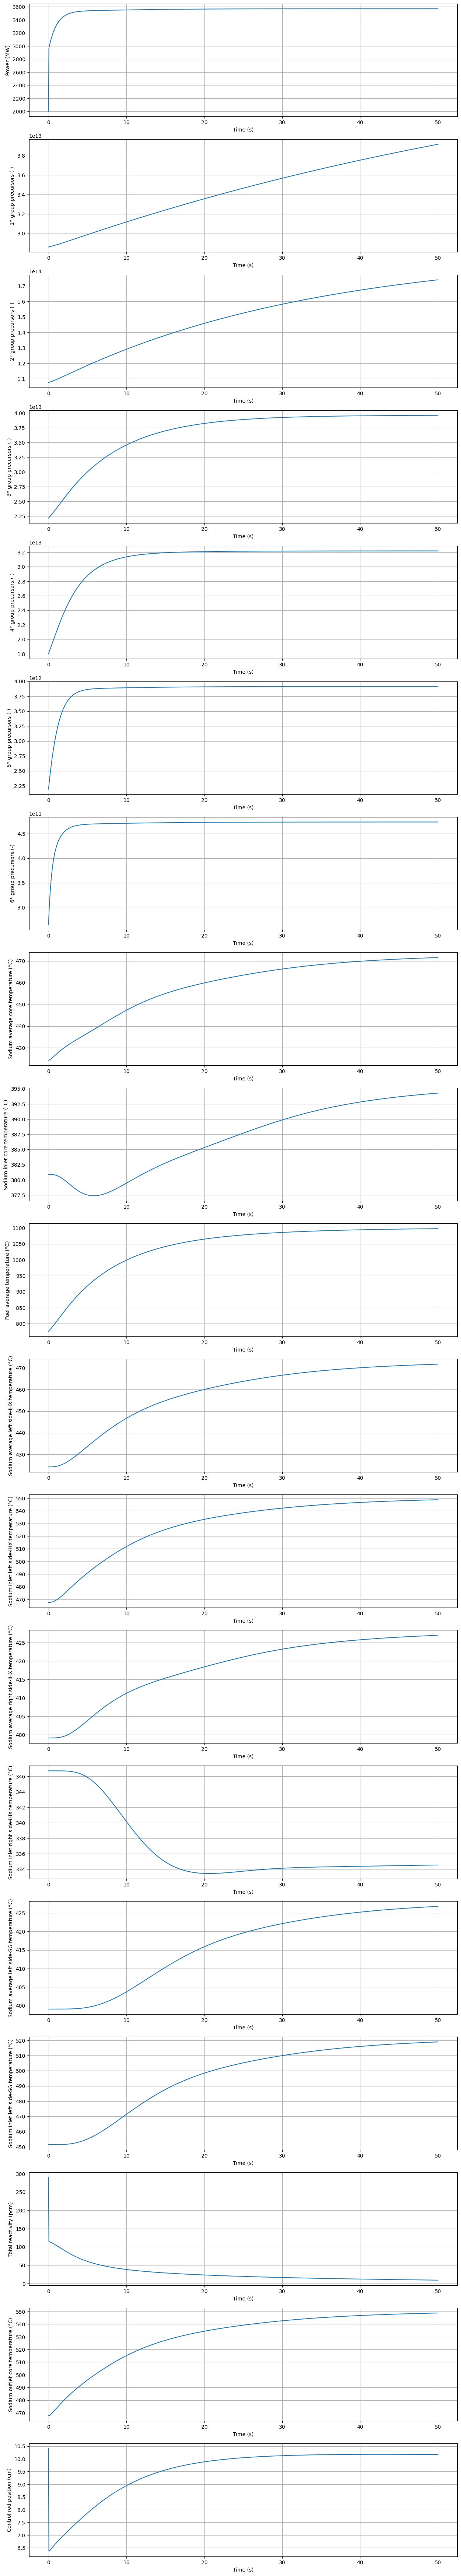

In [10]:
# I consider the conditions present when P = 2 GW
P2 = 2000e6                     # W thermal

C1_0_P2 = P2*bi[0] / (LA*li[0])   # precursors concentrations
C2_0_P2 = P2*bi[1] / (LA*li[1])
C3_0_P2 = P2*bi[2] / (LA*li[2])
C4_0_P2 = P2*bi[3] / (LA*li[3])
C5_0_P2 = P2*bi[4] / (LA*li[4])
C6_0_P2 = P2*bi[5] / (LA*li[5])

alpha_c = alpha_s + alpha_r # 1/°C
alpha_f = alpha_d + alpha_a # 1/°C

# I solve this linear system in order to calculate the temperatures in steady state when P0 = 2 GW
coeff = np.array([[-K,                     0, K,                   0,          0,                  0,         0,                 0,         0],
                  [-(2*G_c*C_c+K), 2*G_c*C_c, K,                   0,          0,                  0,         0,                 0,         0],
                  [0,                      0, 0, (K_IHX + 2*G_c*C_c), -2*G_c*C_c,             -K_IHX,         0,                 0,         0],
                  [0,                      0, 0,               K_IHX,          0, -(K_IHX+2*G_2*C_2), 2*G_2*C_2,                 0,         0],
                  [0,                      0, 0,                   0,          0,                  0,         0, -(K_SG+2*G_2*C_2), 2*G_2*C_2],
                  [2,                     -1, 0,                   0,         -1,                  0,         0,                 0,         0],
                  [0,                     -1, 0,                   2,         -1,                  0,         0,                 0,         0],
                  [0,                      0, 0,                   0,          0,                  0,        -1,                 2,        -1],
                  [0,                      0, 0,                   0,          0,                  2,        -1,                 0,        -1]
                  ])

right_side = np.array([P2, 0, 0, 0, -K_SG*Tsat, 0, 0, 0, 0])

Tc0_P2, Tc_in0_P2, Tf0_P2, T1_0_P2, T1_in0_P2, T2_0_P2, T2_in0_P2, TSG_0_P2, TSG_in0_P2 = np.linalg.solve(coeff, right_side)

# In steady state condition, the outlet temperatures are:
Tc_out0_P2 = 2*Tc0_P2 - Tc_in0_P2
T1_out0_P2 = 2*T1_0_P2 - T1_in0_P2
T2_out0_P2 = 2*T2_0_P2 - T2_in0_P2
TSG_out0_P2 = 2*TSG_0_P2 - TSG_in0_P2

# The initial conditions of my system when P0 = 2 GW are:
TH_0 = np.array([[Tc0_P2], [Tc_in0_P2], [Tf0_P2], [T1_0_P2], [T1_in0_P2], [T2_0_P2], [T2_in0_P2], [TSG_0_P2], [TSG_in0_P2]])
NEU_0 = np.array([[P2], [C1_0_P2], [C2_0_P2], [C3_0_P2], [C4_0_P2], [C5_0_P2], [C6_0_P2]])
SFR_0 = np.append(NEU_0, TH_0)

# time points
t_0 = 0      # s
t_f = 50     # s
t_span = (t_0, t_f)
t = np.linspace(t_0, t_f, 1000)

#PI controller parameters
Kp = 1e-8     # cm/W
Ki = 1e-8     # cm/J

P_ref = 3570e6                                # W thermal
Con_0 = np.append(np.array(P_ref - P2), 0)    # e=P_ref-P0, E=0
Max_reactivity = 0.8*b                        # max reactivity that I can insert at once

IC = np.append(SFR_0, Con_0)

# Following TRIGA case, I define the function describing the feedback coefficient due to control rod position
B = 388.487
C = 0.073
D = -1.339

alpha_h_TRIGA = lambda hhh: B*C*np.cos(C*hhh + D)*1e-5  # 1/cm

# Model
def Dyn_IP_model(t, state):

  P, C1, C2, C3, C4, C5, C6, Tc, Tc_in, Tf, T1, T1_in, T2, T2_in, TSG, TSG_in, e, E = state

  dPdt = (rho_0 + min(alpha_h_TRIGA(Kp*e + Ki*E)*(Kp*e + Ki*E), Max_reactivity) + alpha_f*(Tf - TH_0[2]) + alpha_c*(Tc - TH_0[0]) - b) * P/LA + li[0]*C1 + li[1]*C2 + li[2]*C3 + li[3]*C4 + li[4]*C5 + li[5]*C6

  dC1dt = bi[0]*P/LA - li[0]*C1
  dC2dt = bi[1]*P/LA - li[1]*C2
  dC3dt = bi[2]*P/LA - li[2]*C3
  dC4dt = bi[3]*P/LA - li[3]*C4
  dC5dt = bi[4]*P/LA - li[4]*C5
  dC6dt = bi[5]*P/LA - li[5]*C6

  dTcdt = (Tf - Tc)/tau_c - 2*(Tc - Tc_in)/tau_0
  dTc_indt = ((2*T1 - T1_in) - Tc_in)/tau_CL1

  dTfdt = P/(M_f*C_f) - (Tf - Tc)/tau_f

  dT1dt = - (T1 - T2)/tau_IHX1 - 2*(T1 - T1_in)/tau_1
  dT1_indt = ((2*Tc - Tc_in) - T1_in)/tau_HL1

  dT2dt = (T1 - T2)/tau_IHX2 - 2*(T2 - T2_in)/tau_2
  dT2_indt = ((2*TSG - TSG_in) - T2_in)/tau_CL2

  dTSGdt = - (TSG - Tsat)/tau_SG2 - 2*(TSG - TSG_in)/tau_SG
  dTSG_indt = ((2*T2 - T2_in) - TSG_in)/tau_HL2

  dedt = - dPdt     # e=P_ref-P
  dEdt = e

  dXdt = [dPdt, dC1dt, dC2dt, dC3dt, dC4dt, dC5dt, dC6dt, dTcdt, dTc_indt, dTfdt, dT1dt, dT1_indt, dT2dt, dT2_indt, dTSGdt, dTSG_indt, dedt, dEdt]

  return dXdt

# ODE solver
sol = sp.integrate.solve_ivp(Dyn_IP_model, t_span, IC, t_eval=t, method='LSODA', rtol = 1e-6, atol = 1e-8)

sol.y[0] = sol.y[0] * 1e-6       # I measure power in MW

# Other variables to be printed:
delta_Tf = sol.y[9] - TH_0[2]    # fuel temperature variation from the IC during time
delta_Tc = sol.y[7] - TH_0[0]    # coolant temperature variation from the IC during time

PI_error = Kp*sol.y[-2] + Ki*sol.y[-1] # cm

dh = np.minimum(PI_error, Max_reactivity/alpha_h_TRIGA(PI_error))                          # rod is inserted or lifted in order to control the reaction
rho = (rho_0 + alpha_h_TRIGA(PI_error)*dh + alpha_f*delta_Tf + alpha_c*delta_Tc) * 1e5     # reactivity at each time in (pcm)
Tc_out = 2*sol.y[7] - sol.y[8]                                                             # core outlet temperature at each time

fig, axs = plt.subplots(len(sol.y)+1, 1, figsize=(15, 90))

Titles_PI = np.append(Titles, "Control rod position (cm)")

# I copy in a new array all the variables I want to plot
results = np.array([solution_i for solution_i in sol.y[:-2]])

results = np.vstack([results, [rho, Tc_out, dh]])

for j in range(len(results)):   # I plot the output variables in response to the 1° step input
  axs[j].plot(t, results[j])
  axs[j].set_ylabel(f'{Titles_PI[j]}')
  axs[j].set_xlabel('Time (s)')
  axs[j].grid()


Thanks to PI control, control rods are lifted up and the power, together with all the other parameters, is brought to its nominal value

# PI control in case of noisy input: T_sat
Now the value of Tsat oscillates in time while the system tries to go from P0=2GW to its nominal power regime

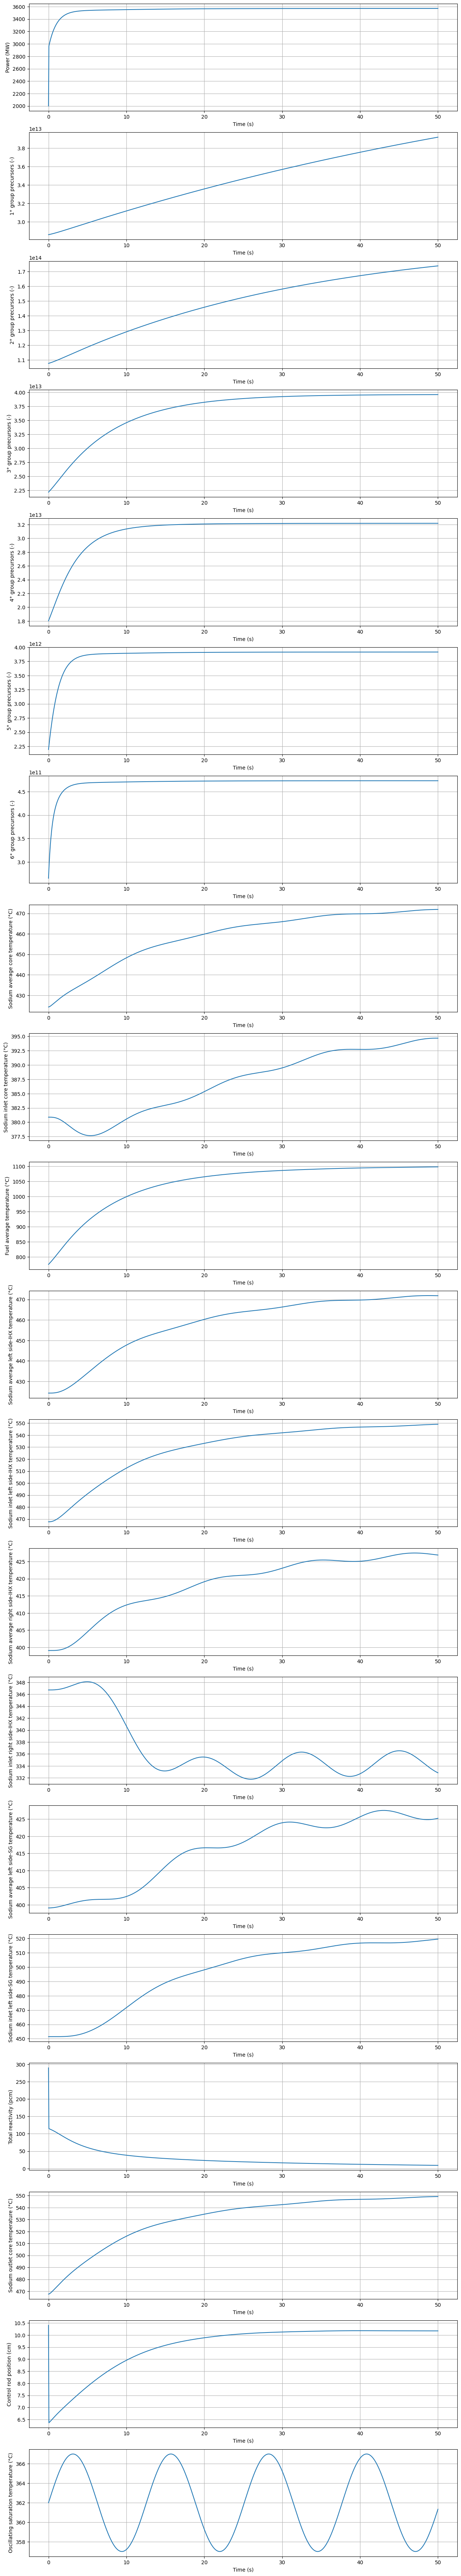

In [11]:
# I initialise the noisy input
Tsat = 362              # °C
freq = 0.5              # 1/s
noise_amplitude = 5     # °C, this coefficient determines the maximum amplitude of the oscillation: 5% of the nominal value

noise_Tsat = lambda ttt: noise_amplitude*np.sin(freq*ttt) # °C

# time points
t_0 = 0      # s
t_f = 50     # s
t_span = (t_0, t_f)
t = np.linspace(t_0, t_f, 1000)

# Model
def Dyn_IP_noise_Tsat_model(t, state):

  P, C1, C2, C3, C4, C5, C6, Tc, Tc_in, Tf, T1, T1_in, T2, T2_in, TSG, TSG_in, e, E = state

  dPdt = (rho_0 + min(alpha_h_TRIGA(Kp*e + Ki*E)*(Kp*e + Ki*E), Max_reactivity) + alpha_f*(Tf - TH_0[2]) + alpha_c*(Tc - TH_0[0]) - b) * P/LA + li[0]*C1 + li[1]*C2 + li[2]*C3 + li[3]*C4 + li[4]*C5 + li[5]*C6

  dC1dt = bi[0]*P/LA - li[0]*C1
  dC2dt = bi[1]*P/LA - li[1]*C2
  dC3dt = bi[2]*P/LA - li[2]*C3
  dC4dt = bi[3]*P/LA - li[3]*C4
  dC5dt = bi[4]*P/LA - li[4]*C5
  dC6dt = bi[5]*P/LA - li[5]*C6

  dTcdt = (Tf - Tc)/tau_c - 2*(Tc - Tc_in)/tau_0
  dTc_indt = ((2*T1 - T1_in) - Tc_in)/tau_CL1

  dTfdt = P/(M_f*C_f) - (Tf - Tc)/tau_f

  dT1dt = - (T1 - T2)/tau_IHX1 - 2*(T1 - T1_in)/tau_1
  dT1_indt = ((2*Tc - Tc_in) - T1_in)/tau_HL1

  dT2dt = (T1 - T2)/tau_IHX2 - 2*(T2 - T2_in)/tau_2
  dT2_indt = ((2*TSG - TSG_in) - T2_in)/tau_CL2

  dTSGdt = - (TSG - (Tsat + noise_Tsat(t)))/tau_SG2 - 2*(TSG - TSG_in)/tau_SG
  dTSG_indt = ((2*T2 - T2_in) - TSG_in)/tau_HL2

  dedt = -dPdt
  dEdt = e

  dXdt = [dPdt, dC1dt, dC2dt, dC3dt, dC4dt, dC5dt, dC6dt, dTcdt, dTc_indt, dTfdt, dT1dt, dT1_indt, dT2dt, dT2_indt, dTSGdt, dTSG_indt, dedt, dEdt]

  return dXdt

# ODE solver
sol = sp.integrate.solve_ivp(Dyn_IP_noise_Tsat_model, t_span, IC, t_eval=t, method='LSODA', rtol = 1e-6, atol = 1e-8)

# Other variables to be printed:
delta_Tf = sol.y[9] - TH_0[2]    # fuel temperature variation from the IC during time
delta_Tc = sol.y[7] - TH_0[0]    # coolant temperature variation from the IC during time

PI_error = Kp*sol.y[-2] + Ki*sol.y[-1] # cm

dh = np.minimum(PI_error, Max_reactivity/alpha_h_TRIGA(PI_error))                          # rod is inserted or lifted in order to control the reaction
rho = (rho_0 + alpha_h_TRIGA(PI_error)*dh + alpha_f*delta_Tf + alpha_c*delta_Tc) * 1e5     # reactivity at each time in pcm
Tc_out = 2*sol.y[7] - sol.y[8]                                                             # °C, core outlet temperature at each time

sol.y[0] = sol.y[0] * 1e-6         # I measure power in MW

# I copy in a new array all the variables I want to plot
results = np.array([solution_i for solution_i in sol.y[:-2]])

results = np.vstack([results, [rho, Tc_out, dh, (Tsat + noise_Tsat(t))]])

Titles_noise_Tsat = np.append(Titles_PI, 'Oscillating saturation temperature (°C)')

fig, axs = plt.subplots(len(results), 1, figsize=(15, 90))

for j in range(len(results)):   # I plot the output variables in response to the 1° step input
  axs[j].plot(t, results[j])
  axs[j].set_ylabel(f'{Titles_noise_Tsat[j]}')
  axs[j].set_xlabel('Time (s)')
  axs[j].grid()


An oscillation of the saturation temperature of the water cycle of 5°C of amplitude makes the temperatures of sodium do the same, however their range of oscillation is smaller. With higher frequencies instead, the variation of Tsat is so fast that only the intermediate sodium cycle is able to keep up with it, while the main cycle isn't particularly affected by it

# PI control in case of noisy input: P_ref-P
Now the value of the error oscillates in time while the system tries to go from P0=2GW to its nominal power regime

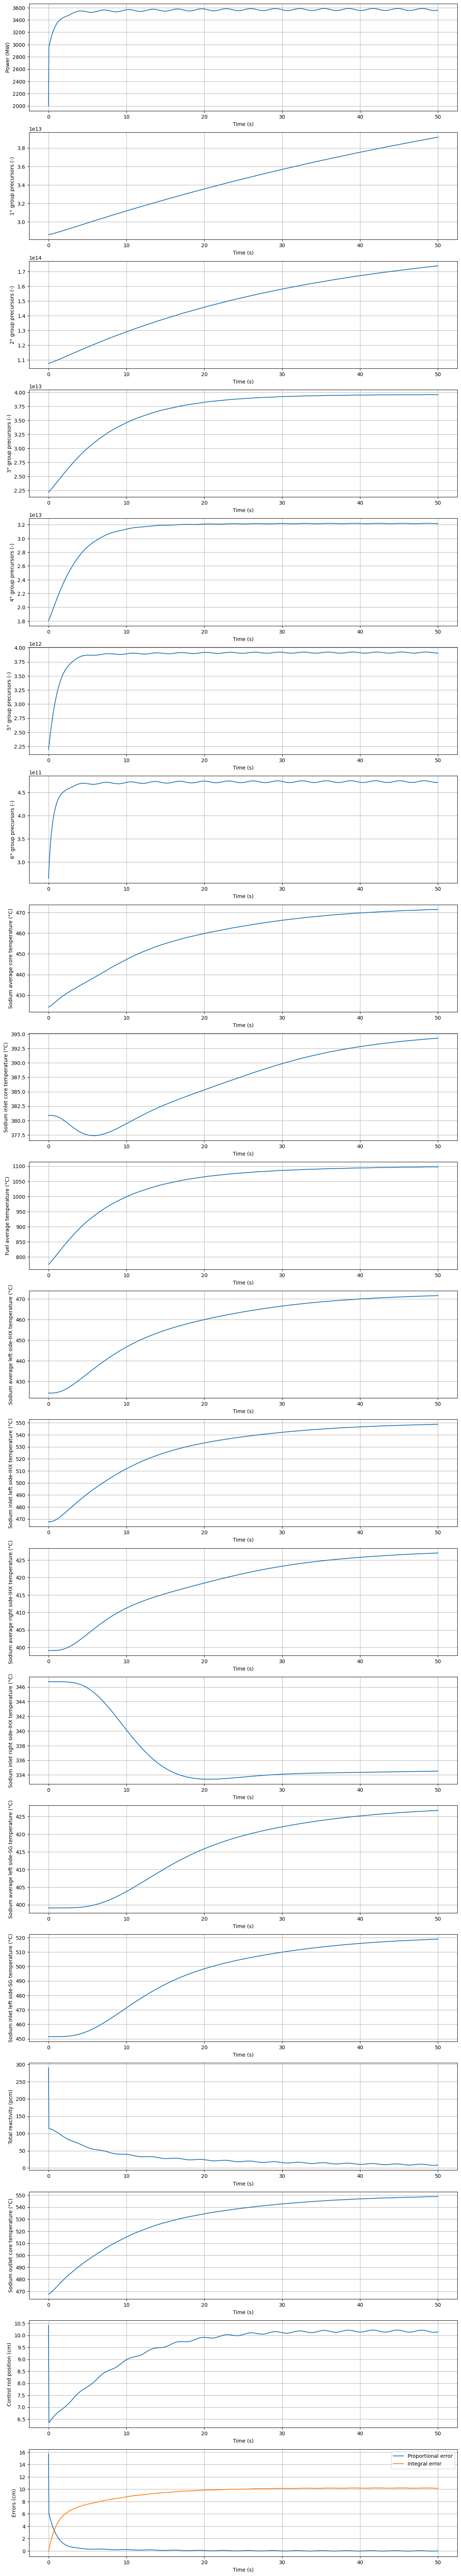

In [13]:
# I initialise the noisy input
Tsat = 362              # °C
freq = 2                # 1/s
noise_amplitude = 20e6  # W, this coefficient determines the maximum amplitude of the oscillation

noise_e = lambda ttt: noise_amplitude*np.sin(freq*ttt)         # proportional oscillating error
noise_E = lambda ttt: -noise_amplitude*np.cos(freq*ttt)/freq   # integral oscillating error

# time points
t_0 = 0      # s
t_f = 50     # s
t_span = (t_0, t_f)
t = np.linspace(t_0, t_f, 1000)

# Model
def Dyn_IP_noise_e_model(t, state):

  P, C1, C2, C3, C4, C5, C6, Tc, Tc_in, Tf, T1, T1_in, T2, T2_in, TSG, TSG_in, e, E = state

  dPdt = (rho_0 + min(alpha_h_TRIGA(Kp*(e + noise_e(t)) + Ki*(E + noise_E(t))) * (Kp*(e + noise_e(t)) + Ki*(E + noise_E(t))), Max_reactivity) + alpha_f*(Tf - TH_0[2]) + alpha_c*(Tc - TH_0[0]) - b) * P/LA + li[0]*C1 + li[1]*C2 + li[2]*C3 + li[3]*C4 + li[4]*C5 + li[5]*C6

  dC1dt = bi[0]*P/LA - li[0]*C1
  dC2dt = bi[1]*P/LA - li[1]*C2
  dC3dt = bi[2]*P/LA - li[2]*C3
  dC4dt = bi[3]*P/LA - li[3]*C4
  dC5dt = bi[4]*P/LA - li[4]*C5
  dC6dt = bi[5]*P/LA - li[5]*C6

  dTcdt = (Tf - Tc)/tau_c - 2*(Tc - Tc_in)/tau_0
  dTc_indt = ((2*T1 - T1_in) - Tc_in)/tau_CL1

  dTfdt = P/(M_f*C_f) - (Tf - Tc)/tau_f

  dT1dt = - (T1 - T2)/tau_IHX1 - 2*(T1 - T1_in)/tau_1
  dT1_indt = ((2*Tc - Tc_in) - T1_in)/tau_HL1

  dT2dt = (T1 - T2)/tau_IHX2 - 2*(T2 - T2_in)/tau_2
  dT2_indt = ((2*TSG - TSG_in) - T2_in)/tau_CL2

  dTSGdt = - (TSG - Tsat)/tau_SG2 - 2*(TSG - TSG_in)/tau_SG
  dTSG_indt = ((2*T2 - T2_in) - TSG_in)/tau_HL2

  dedt = -dPdt
  dEdt = e

  dXdt = [dPdt, dC1dt, dC2dt, dC3dt, dC4dt, dC5dt, dC6dt, dTcdt, dTc_indt, dTfdt, dT1dt, dT1_indt, dT2dt, dT2_indt, dTSGdt, dTSG_indt, dedt, dEdt]

  return dXdt

# ODE solver
sol = sp.integrate.solve_ivp(Dyn_IP_noise_e_model, t_span, IC, t_eval=t, method='LSODA', rtol = 1e-6, atol = 1e-8)

# Other variables to be printed:
delta_Tf = sol.y[9] - TH_0[2]    # fuel temperature variation from the IC during time
delta_Tc = sol.y[7] - TH_0[0]    # coolant temperature variation from the IC during time

P_error = Kp*(sol.y[-2] + noise_e(t))   # cm
I_error = Ki*(sol.y[-1] + noise_E(t))   # cm

PI_error = P_error + I_error   # cm

dh = np.minimum(PI_error, Max_reactivity/alpha_h_TRIGA(PI_error))                          # rod is inserted or lifted in order to control the reaction
rho = (rho_0 + alpha_h_TRIGA(PI_error)*dh + alpha_f*delta_Tf + alpha_c*delta_Tc) * 1e5     # reactivity at each time in pcm
Tc_out = 2*sol.y[7] - sol.y[8]                                                             # °C, core outlet temperature at each time

sol.y[0] = sol.y[0] * 1e-6         # I measure power in MW

# I copy in a new array all the variables I want to plot
results = np.array([solution_i for solution_i in sol.y[:-2]])

results = np.vstack([results, [rho, Tc_out, dh]])

fig, axs = plt.subplots(len(results)+1, 1, figsize=(15, 90))

for j in range(len(results)):   # I plot the output variables in response to the 1° step input
  axs[j].plot(t, results[j])
  axs[j].set_ylabel(f'{Titles_PI[j]}')
  axs[j].set_xlabel('Time (s)')
  axs[j].grid()

axs[-1].plot(t, P_error)
axs[-1].plot(t, I_error)
axs[-1].set_ylabel('Errors (cm)')
axs[-1].set_xlabel('Time (s)')
axs[-1].legend(['Proportional error', 'Integral error'])
axs[-1].grid()


The oscillating error between the actual and the reference powers is counterbalanced by repetitive and frequent insertion and lifting of the control rods. Due to this fact, the power oscillates as well, while temperatures aren't significantly affected by this issue since their time constants are too long to catch up with it and since the relative variation of power is really small

# Parametric analysis on the gain coefficients Kp and Ki

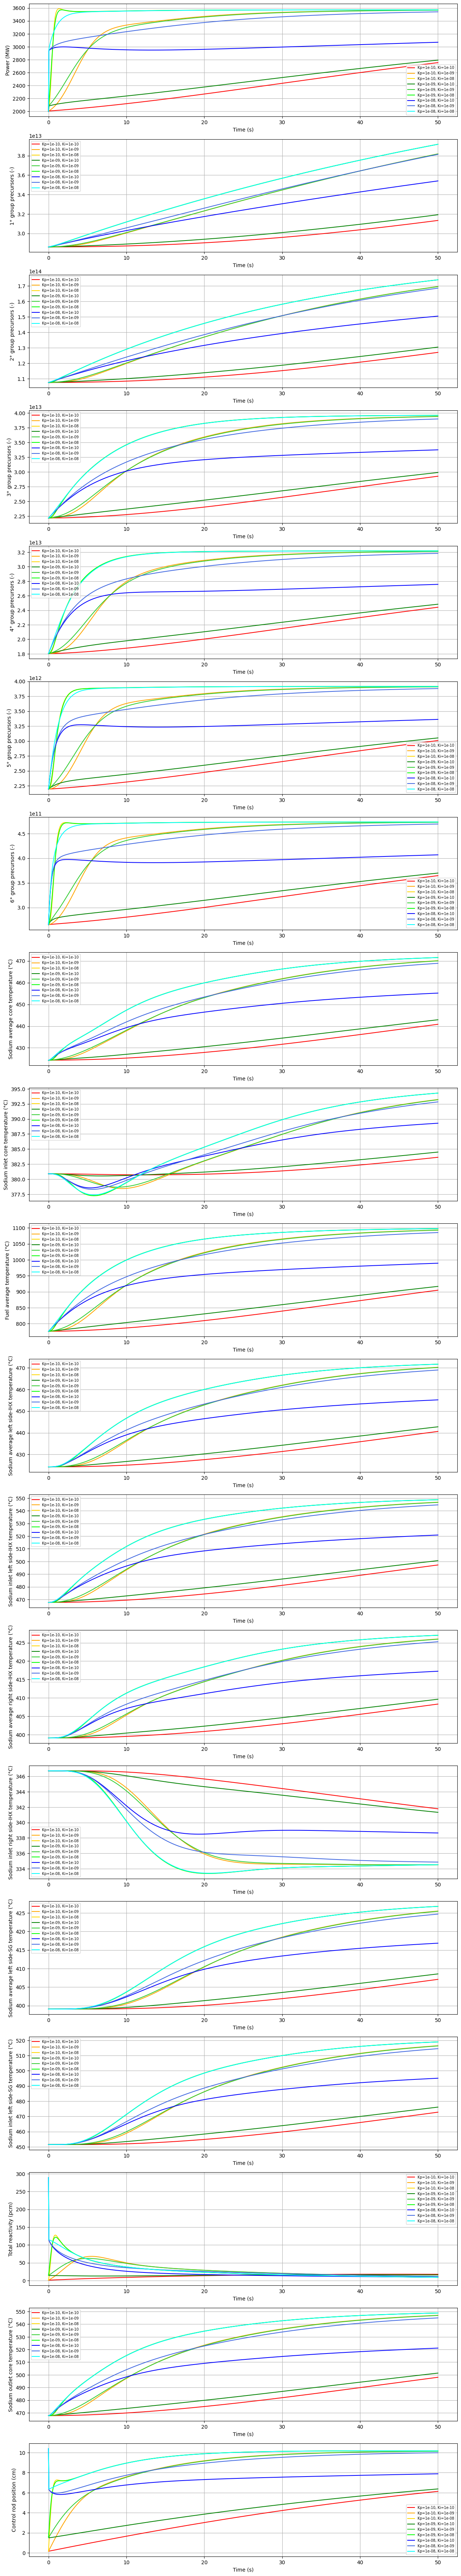

In [14]:
# time points
t_0 = 0      # s
t_f = 50     # s
t_span = (t_0, t_f)
t = np.linspace(t_0, t_f, 1000)

#PID controller parameters
Kp_values = 10**np.linspace(-10, -8, 3)     # cm/W
Ki_values = 10**np.linspace(-10, -8, 3)     # cm/J

# figure where I will plot my variables:
fig, axs = plt.subplots(len(IC)+1, 1, figsize=(15, 90))

colors = ['red', 'orange', 'gold', 'green', 'limegreen', 'lime', 'blue', 'royalblue', 'cyan']

line_names = []

i = 0   # flag to indicate when to add the legend to the plot

# Now I calculate different solutions for different values of the gains
for Kp in Kp_values:
  for Ki in Ki_values:

    # ODE solver
    sol = sp.integrate.solve_ivp(Dyn_IP_model, t_span, IC, t_eval=t, method='LSODA', rtol = 1e-6, atol = 1e-8)

    sol.y[0] = sol.y[0] * 1e-6       # I measure power in MW

    # Other variables to be printed:
    delta_Tf = sol.y[9] - TH_0[2]    # fuel temperature variation from the IC during time
    delta_Tc = sol.y[7] - TH_0[0]    # coolant temperature variation from the IC during time

    PI_error = Kp * sol.y[-2] + Ki * sol.y[-1]  # cm

    dh = np.minimum(PI_error, Max_reactivity/alpha_h_TRIGA(PI_error))                          # rod is inserted or lifted in order to control the reaction
    rho = (rho_0 + alpha_h_TRIGA(PI_error)*dh + alpha_f*delta_Tf + alpha_c*delta_Tc) * 1e5     # reactivity at each time in pcm
    Tc_out = 2*sol.y[7] - sol.y[8]                                                             # core outlet temperature at each time

    # I copy in a new array all the variables I want to plot
    results = np.array([solution_i for solution_i in sol.y[:-2]])

    results = np.vstack([results, [rho, Tc_out, dh]])

    line_names.append('Kp=' +str(Kp)+ ', Ki=' +str(Ki))

    for j in range(len(results)):   # I plot the output variables in response to the 1° step input
      axs[j].plot(t, results[j], color=colors[i])

      if i==8: # last iteration
        axs[j].set_ylabel(f'{Titles_PI[j]}')
        axs[j].set_xlabel('Time (s)')
        axs[j].grid()
        axs[j].legend(line_names, fontsize='x-small')

    i = i + 1

Greater gains determine faster transients, while lower gains make the system variables change slower in time. For Kp even higher (>= 10^7), power overshoots become more evident and the system, in order to follow these sharp variations, assumes an unphysical behavior.

In conclusion, lower gains are suggested in order to have a slow and manageable transient